In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Dropout,LSTM
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt


In [2]:
train_data=pd.read_csv('/content/PM_train.txt',sep=r'\s+',header=None)
test_data=pd.read_csv('/content/PM_test.txt',sep=r'\s+',header=None)

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [5]:
#train_data.head()
#test_data.head()

In [6]:
col_names=['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

In [7]:
train_data.columns=col_names
test_data.columns=col_names

In [8]:
#train_data.head()

In [9]:
#train_data.info()

In [10]:
#test_data.head()

In [11]:
#train_data.describe()

In [12]:
#train_data['cycle'].unique()

In [13]:
truth_table=pd.read_csv('/content/truth_table.txt',sep=r'\s+',header=None)

truth_table.columns=['cycles_left']
truth_table.shape

(100, 1)

In [14]:
truth_table['id']=truth_table.index+1
print(truth_table.head(2))
print(len(truth_table))

   cycles_left  id
0          112   1
1           98   2
100


In [15]:
rul_data=pd.DataFrame(test_data.groupby('id')['cycle'].max()).reset_index()
rul_data.columns=['id','max']
rul_data.head()


,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [16]:
truth_table['rtf']=truth_table['cycles_left']+rul_data['max']
truth_table.head(3)

,cycles_left,id,rtf
0,112,1,143
1,98,2,147
2,69,3,195


In [17]:
truth_table.drop(['cycles_left'],axis=1,inplace=True)
truth_table.head(3)

,id,rtf
0,1,143
1,2,147
2,3,195


In [18]:
test_data=test_data.merge(truth_table,on=['id'],how='left')
test_data.head(3)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,rtf
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143


In [19]:
test_data['ttf']=test_data['rtf']-test_data['cycle']
test_data.drop(['rtf'],axis=1,inplace=True)
test_data.head(3)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,140


In [20]:
train_data['ttf']=train_data.groupby(['id'])['cycle'].transform(max)
train_data.head(3)

/tmp/ipython-input-3796378969.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  train_data['ttf']=train_data.groupby(['id'])['cycle'].transform(max)


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192


In [21]:
train_data['ttf']=train_data['ttf']-train_data['cycle']
train_data.head(3)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189


In [22]:
df_train=train_data.copy()
df_test=test_data.copy()
period=30
df_train['label_bc']=np.where(df_train['ttf']<=30,1,0)
df_test['label_bc']=np.where(df_test['ttf']<=30,1,0)
df_train.head(3)

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0


In [23]:
features_col_name=['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
                   's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
target_col_name='label_bc'

**Feature Scaling**

In [24]:
sc=MinMaxScaler()
df_train[features_col_name]=sc.fit_transform(df_train[features_col_name])
df_test[features_col_name]=sc.transform(df_test[features_col_name])

In [27]:
x_train=[]
y_train=[]

seq_len=50
for eng_id in df_train['id'].unique():
  eng_data=df_train[df_train['id']==eng_id]
  feature_data_train=eng_data[features_col_name].values
  target_data_train=eng_data[target_col_name].values

  for i in range(len(feature_data_train)-seq_len):
    x_train.append(feature_data_train[i:i+seq_len])
    y_train.append(target_data_train[i+seq_len])

X_train=np.array(x_train)
Y_train=np.array(y_train)

print(X_train.shape)
print(Y_train.shape)
print(Y_train)


(15631, 50, 24)
(15631,)
[0 0 0 ... 1 1 1]


In [28]:
x_test=[]
y_test=[]

for eng_id in df_test['id'].unique():
  eng_data=df_test[df_test['id']==eng_id]
  feature_data_test=eng_data[features_col_name].values
  target_data_test=eng_data[target_col_name].values

  for i in range(len(feature_data_test)-seq_len):
    x_test.append(feature_data_test[i:i+seq_len])
    y_test.append(target_data_test[i+seq_len])

X_test=np.array(x_test)
Y_test=np.array(y_test)




In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense

model=Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=False)) # Changed return_sequences to False
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid')) # Added a Dense layer for single output

In [48]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
history=model.fit(X_train,Y_train,epochs=20,validation_split=0.2,batch_size=80,callbacks=[EarlyStopping(monitor='val_loss',patience=3)])

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8714 - loss: 0.3051 - val_accuracy: 0.9357 - val_loss: 0.1450
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9432 - loss: 0.1323 - val_accuracy: 0.9613 - val_loss: 0.0944
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9545 - loss: 0.1013 - val_accuracy: 0.9568 - val_loss: 0.0959
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9659 - loss: 0.0816 - val_accuracy: 0.9587 - val_loss: 0.0857
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9677 - loss: 0.0781 - val_accuracy: 0.9632 - val_loss: 0.0843
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9643 - loss: 0.0792 - val_accuracy: 0.9613 - val_loss: 0.0985
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9704 - loss: 0.0719 - val_accuracy: 0.9562 - val_loss: 0.0931
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9659 - loss: 0.0783 - val_accu

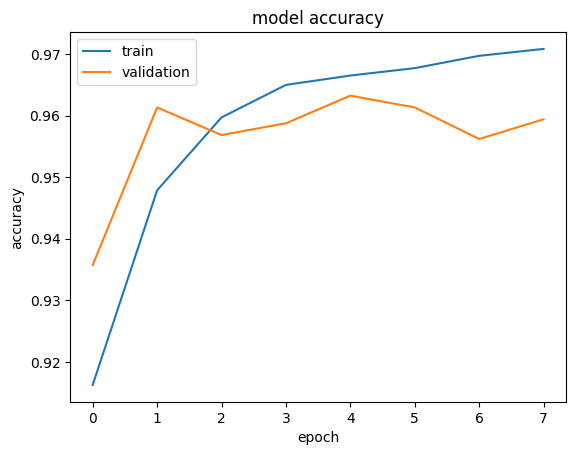

In [50]:
#plot the history val accuracy and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [51]:
scores=model.evaluate(X_test,Y_test)
print(scores)

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9898 - loss: 0.0239
[0.03659330680966377, 0.9851751923561096]


In [52]:
Y_pred=model.predict(X_test)
Y_pred=np.where(Y_pred>0.5,1,0)
print(Y_pred)

256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [53]:
#calculate accuracy score,and classification report of model on test data
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.9851752021563343
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7830
           1       0.89      0.73      0.80       332

    accuracy                           0.99      8162
   macro avg       0.94      0.86      0.90      8162
weighted avg       0.98      0.99      0.98      8162

